BFS: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 30), (2, 9), (2, 27), (2, 28), (2, 32), (5, 16), (8, 33), (31, 24), (31, 25), (27, 23), (32, 14), (32, 15), (32, 18), (32, 20), (32, 22), (32, 29), (33, 26)]
depth 1: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31)]
depth 2: [(1, 30), (2, 28), (2, 9), (5, 16), (8, 33), (2, 32), (31, 24), (31, 25), (2, 27)]
depth 3: [(27, 23), (32, 22), (32, 15), (32, 20), (33, 26), (32, 14), (32, 18), (32, 29)]
depth 4: []
depth 5: []


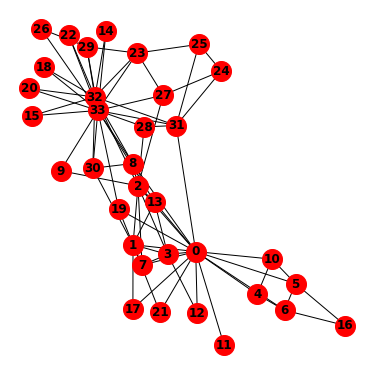

In [1]:
# リスト 5.1 Zachary's karate clubネットワークでの幅優先探索
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()
plt.figure(figsize=(5, 5))
nx.draw_spring(G, node_size=400, node_color="red", with_labels=True, font_weight='bold')
print("BFS:", list(nx.bfs_edges(G, source=0)))

d1 = list(nx.bfs_edges(G, source=0, depth_limit=1))
print("depth 1:", d1)
d2 = list(nx.bfs_edges(G, source=0, depth_limit=2))
print("depth 2:", list(set(d2)-set(d1)))
d3 = list(nx.bfs_edges(G, source=0, depth_limit=3))
print("depth 3:", list(set(d3)-set(d2)))
d4 = list(nx.bfs_edges(G, source=0, depth_limit=4))
print("depth 4:", list(set(d4)-set(d3)))
d5 = list(nx.bfs_edges(G, source=0, depth_limit=5))
print("depth 5:", list(set(d5)-set(d4)))

[0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 3, 2, 1, 3, 1, 3, 1, 3, 3, 2, 2, 3, 2, 2, 3, 2, 1, 2, 2]


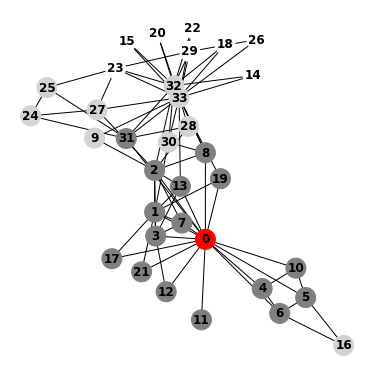

In [3]:
# リスト 5.2 幅優先探索の距離に応じた可視化
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()
known = [0] * nx.number_of_nodes(G) 
dist = [-1] * nx.number_of_nodes(G)
colors = ['red', 'gray', 'lightgray', 'white']
color_map = ['black'] * nx.number_of_nodes(G)

start = 0
dist[start] = 0
color_map[start] = colors[dist[start]]
known[start] = 1

d = 0
while sum(known) != nx.number_of_nodes(G) :
  for n in nx.nodes(G) :
    if nx.shortest_path_length(G, start, n) == d :
      for nb in G.neighbors(n) :
        if known[nb] != 1 :
          dist[nb] = d + 1
          color_map[nb] = colors[dist[nb]]
          known[nb] = 1
  d = d + 1

print(dist)
plt.figure(figsize=(5, 5))
nx.draw_spring(G, node_size=400, node_color=color_map, with_labels=True, font_weight='bold')

DFS: [(0, 1), (1, 2), (2, 3), (3, 7), (3, 12), (3, 13), (13, 33), (33, 8), (8, 30), (30, 32), (32, 14), (32, 15), (32, 18), (32, 20), (32, 22), (32, 23), (23, 25), (25, 24), (24, 27), (24, 31), (31, 28), (23, 29), (29, 26), (33, 9), (33, 19), (1, 17), (1, 21), (0, 4), (4, 6), (6, 5), (5, 10), (5, 16), (0, 11)]
traversed nodes: [0, 1, 2, 3, 7, 12, 13, 33, 8, 30, 32, 14, 15, 18, 20, 22, 23, 25, 24, 27, 31, 28, 29, 26, 9, 19, 17, 21, 4, 6, 5, 10, 16, 11]


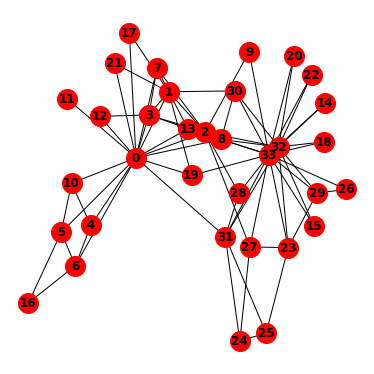

In [4]:
# リスト 5.3 Zachary's karate clubネットワークでの深さ優先探索
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()
plt.figure(figsize=(5, 5))
nx.draw_spring(G, node_size=400, node_color="red", with_labels=True, font_weight='bold')

print("DFS:", list(nx.dfs_edges(G, source=0)))
print("traversed nodes:", list(nx.dfs_preorder_nodes(G, source=0)))

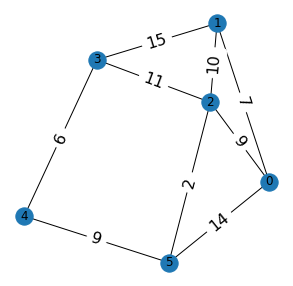

[999, 0, 999, 999, 999, 999]
[0, 0, 0, 0, 0, 0]
[7, 0, 10, 15, 999, 999]
[0, 1, 0, 0, 0, 0]
[7, 0, 10, 15, 999, 21]
[1, 1, 0, 0, 0, 0]
[7, 0, 10, 15, 999, 12]
[1, 1, 1, 0, 0, 0]
[7, 0, 10, 15, 21, 12]
[1, 1, 1, 0, 0, 1]
[7, 0, 10, 15, 21, 12]
[1, 1, 1, 1, 0, 1]
[7, 0, 10, 15, 21, 12]
[1, 1, 1, 1, 1, 1]


In [5]:
# リスト 5.4 ダイクストラのアルゴリズム
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import functools
import operator

G = nx.Graph()
G.add_nodes_from(range(0, 5))
G.add_weighted_edges_from([(0, 1, 7), (0, 2, 9), (0, 5, 14), (1, 2, 10), (1, 3, 15), (2, 3, 11), (2, 5, 2), (3, 4, 6), (4, 5, 9)])

plt.figure(figsize=(5, 5))
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edge_labels(G, pos, font_size=16, edge_labels={(u, v): d["weight"] for u, v, d in G.edges(data=True)})
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()

dist_estimate = [999] * nx.number_of_nodes(G)
dist_certainty = [0] * nx.number_of_nodes(G)
dist_estimate[1] = 0

while functools.reduce(operator.mul, dist_certainty) == 0 :
  print(dist_estimate)
  print(dist_certainty)
  min_v = 999
  for n in nx.nodes(G) :
    if (dist_certainty[n] == 0) and (dist_estimate[n] <= min_v) :
      min_v = dist_estimate[n]
      min_id = n
  dist_certainty[min_id] = 1
  for nb in G.neighbors(min_id) :
    new_estimate = G[min_id][nb]['weight'] + dist_estimate[min_id]
    if new_estimate < dist_estimate[nb] :
      dist_estimate[nb] = new_estimate
      
print(dist_estimate)
print(dist_certainty)

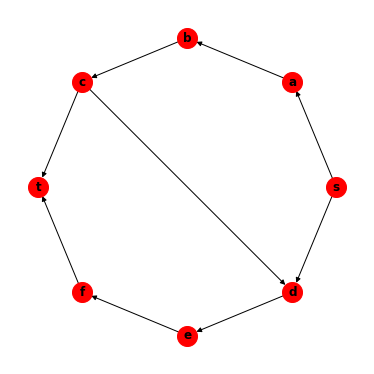

In [6]:
# リスト 5.5 2頂点間の独立のパス
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edge('s','a')
G.add_edge('a','b')
G.add_edge('b','c')
G.add_edge('c','t')
G.add_edge('f','t')
G.add_edge('e','f')
G.add_edge('d','e')
G.add_edge('s','d')
G.add_edge('c','d')

plt.figure(figsize=(5, 5))
nx.draw_circular(G, node_size=400, node_color="red", with_labels=True, font_weight='bold')

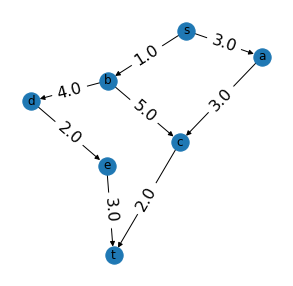

flow value from s to t: 3.0
the value of flow through edge s-b: 1.0
the value of flow through edge s-a: 2.0
min cut value between s and t: 3.0
reachable nodes from s: {'s', 'c', 'a'}
unreachable nodes from s: {'e', 'b', 'd', 't'}
cut set: [('c', 't'), ('s', 'b')]
min cut value == sum of cut set capacity?: True


In [7]:
# リスト 5.6 最大流最小カット
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = nx.DiGraph()
G.add_edge('s','a', capacity=3.0)
G.add_edge('s','b', capacity=1.0)
G.add_edge('a','c', capacity=3.0)
G.add_edge('b','c', capacity=5.0)
G.add_edge('b','d', capacity=4.0)
G.add_edge('d','e', capacity=2.0)
G.add_edge('c','t', capacity=2.0)
G.add_edge('e','t', capacity=3.0)

plt.figure(figsize=(5, 5))
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edge_labels(G, pos, font_size=16, edge_labels={(u, v): d["capacity"] for u, v, d in G.edges(data=True)})
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()

flow_value, flow_dict = nx.maximum_flow(G, 's', 't')
print("flow value from s to t:", flow_value)
print("the value of flow through edge s-b:", flow_dict['s']['b'])
print("the value of flow through edge s-a:", flow_dict['s']['a'])

cut_value, partition = nx.minimum_cut(G, 's', 't')
reachable, non_reachable = partition
print("min cut value between s and t:", cut_value)
print("reachable nodes from s:", reachable)
print("unreachable nodes from s:", non_reachable)

cutset = set()
for u, nbrs in ((n, G[n]) for n in reachable):
  cutset.update((u, v) for v in nbrs if v in non_reachable)
print("cut set:", sorted(cutset))

print("min cut value == sum of cut set capacity?:", cut_value == sum(G[u][v]['capacity'] for (u, v) in cutset))
